ANLY 580 | NLP | Wine Classifier Project

### Prep

In [1]:
# set working directory
import os
import sys
project_root = '/Users/kgedney/Documents/georgetown/anly580/anly580-wine-project'
os.chdir(project_root)

# ignore gensim warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# install packages
import re
import gensim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
# load kaggle data from wine mag
df = pd.read_csv('data/winemag-data_first150k.csv', encoding='utf-8')

# load scraped data from wine cellar
df2 = pd.read_csv('data/cellarinsider_raw.csv')

#### Preprocess text data

In [4]:
# combine datasets
notes = list(df.description) + list(df2.note)
len(notes)

168643

In [5]:
# make lowercase and remove punctuation
cleantext = [n.lower() for n in notes]
cleantext = [re.sub('[^a-zA-Z0-9_]+', ' ', n) for n in cleantext]

In [6]:
# tokenize
documents = [n.split() for n in cleantext]

### Create Word Embeddings using Word2Vec algorithm (via gensim library)

- Unsupervised
- Based on all wine reviews available: Kaggle and the dataset scraped from Wine Cellar (scrape_wine_notes.py).   
- Using CBOW

https://radimrehurek.com/gensim/models/word2vec.html   
http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XArr1xNKhE4

In [7]:
# define model 
model = gensim.models.Word2Vec(documents, 
                               size=128, 
                               window=5, 
                               min_count=1, 
                               workers=4)

In [8]:
# train model
model.train(documents, total_examples=len(documents), epochs=32)

(163790606, 226792224)

#### Analysis and Vector Math

In [9]:
model.wv.most_similar('oak')

[('wood', 0.6146730184555054),
 ('oaky', 0.5512720942497253),
 ('barrel', 0.5306674242019653),
 ('woodsap', 0.48928773403167725),
 ('goodnight', 0.43269962072372437),
 ('vanillins', 0.43204063177108765),
 ('lagers', 0.42953598499298096),
 ('char', 0.42396050691604614),
 ('baguette', 0.4204753041267395),
 ('orleans', 0.4157569706439972)]

In [10]:
# vector analogy
model.most_similar(positive=['rich', 'sweet'], negative=['pinot'])

[('ripe', 0.6117731332778931),
 ('lush', 0.5621058940887451),
 ('luscious', 0.4986572861671448),
 ('generous', 0.4963712692260742),
 ('juicy', 0.4829726219177246),
 ('thick', 0.4758625626564026),
 ('soft', 0.4728173613548279),
 ('fleshy', 0.47237467765808105),
 ('superripe', 0.4690747559070587),
 ('jammy', 0.4602850079536438)]

In [11]:
# vector math
model.most_similar(positive=['chardonnay'], negative=['oak', 'oaky'], topn=5)

[('erbaluce', 0.46224892139434814),
 ('riesling', 0.4328096807003021),
 ('incisive', 0.41309884190559387),
 ('falanghina', 0.4123361110687256),
 ('gavi', 0.41144269704818726)]

In [12]:
model.wv.most_similar(positive=['chardonnay'], negative=['oak', 'oaky'], topn=5)

[('erbaluce', 0.46224892139434814),
 ('riesling', 0.4328096807003021),
 ('incisive', 0.41309884190559387),
 ('falanghina', 0.4123361110687256),
 ('gavi', 0.41144269704818726)]

In [13]:
model.wv.most_similar(positive=['chardonnay', 'red'], negative=['oak'], topn=10)

[('chard', 0.44626080989837646),
 ('ros', 0.436409056186676),
 ('riesling', 0.3998516798019409),
 ('vaz', 0.39384084939956665),
 ('white', 0.3934729993343353),
 ('yellow', 0.3878457546234131),
 ('roditis', 0.3869280219078064),
 ('ant', 0.36574146151542664),
 ('goumenissa', 0.36567968130111694),
 ('pg', 0.35657674074172974)]

In [14]:
model.wv.most_similar(positive=['cranberry'], topn=10)

[('pomegranate', 0.7396677732467651),
 ('rhubarb', 0.6800030469894409),
 ('strawberry', 0.6675568222999573),
 ('raspberry', 0.5485731959342957),
 ('blueberry', 0.5371654033660889),
 ('red', 0.5323254466056824),
 ('cherry', 0.526641309261322),
 ('elderberry', 0.5061183571815491),
 ('plum', 0.5050449371337891),
 ('bing', 0.4973149001598358)]

In [15]:
model.wv.most_similar(positive=['sweetened'], topn=10)

[('enriched', 0.5484488010406494),
 ('accented', 0.5340783596038818),
 ('sugared', 0.529091477394104),
 ('touched', 0.4996594190597534),
 ('sweet', 0.4961460530757904),
 ('blasted', 0.48884257674217224),
 ('doused', 0.4819881319999695),
 ('doctored', 0.4814201593399048),
 ('infused', 0.4658183455467224),
 ('swamped', 0.45340830087661743)]

In [16]:
# save vectors
X = model[model.wv.vocab]

In [17]:
# create dataframe
df_vectors = pd.DataFrame(X)
df_vectors['word'] = list(model.wv.vocab.keys())

In [18]:
# save dataframe
df_vectors.to_csv('wine_wv.csv')

In [79]:
#pd.DataFrame(X).to_csv('wine_wv.tsv', header=None, sep='\t', index=False)
#pd.DataFrame({"word" : list(model.wv.vocab.keys())}).to_csv('wine_labels.tsv', index=False, header=False)

#### Basic tSNE Plot

In [58]:
# fit to tSNE (sklearn version)
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

In [ ]:
# ref: https://github.com/DmitryUlyanov/Multicore-TSNE

In [19]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2, n_jobs=4)
Y = tsne.fit_transform(X)

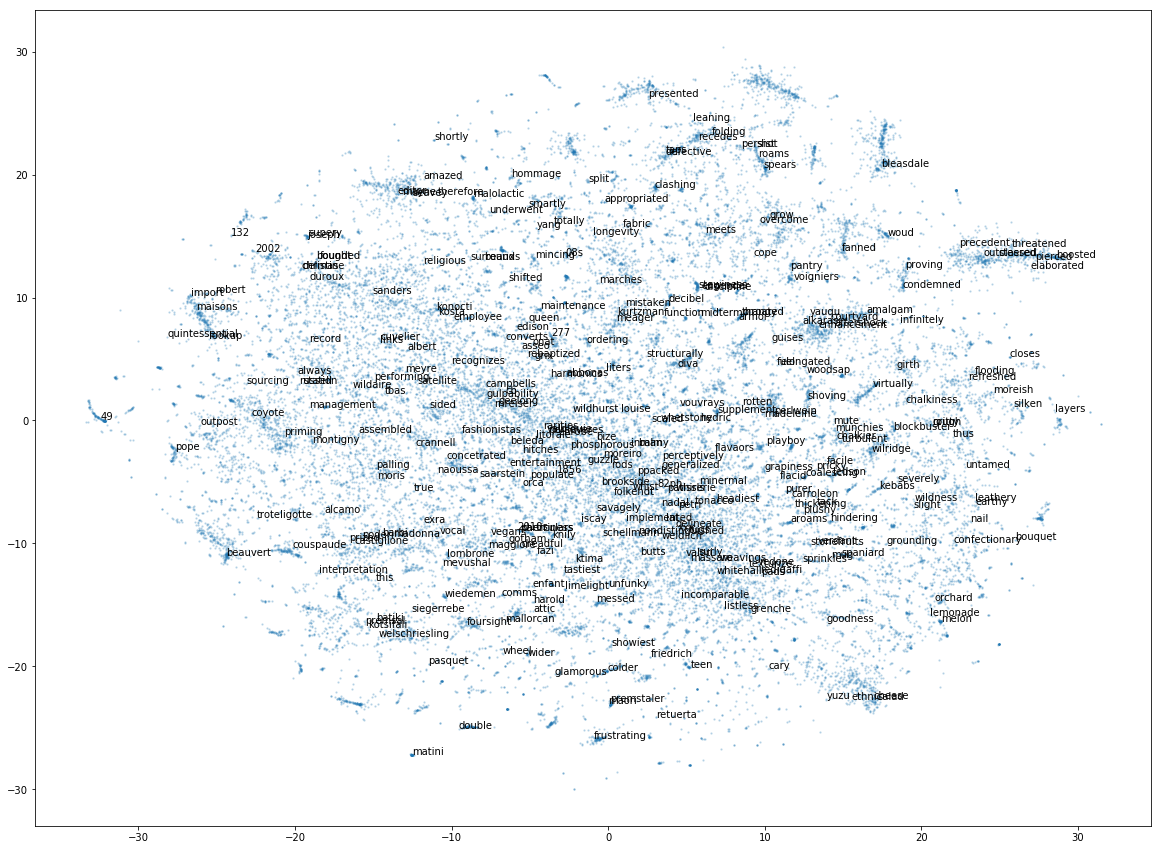

In [31]:
# plot tsne
plt.figure(figsize=(20,15))
plt.scatter(Y[:,0], Y[:,1], s=2, alpha=0.2)

for i, txt in enumerate(df_vectors.word):
    if not i % 101:
        plt.annotate(txt, (Y[i,0], Y[i,1]))

plt.show()

#### Interactive plot with Bokeh

In [ ]:
# https://projector.tensorflow.org/

In [56]:
from bokeh.plotting import figure, show, ColumnDataSource, save
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [45]:
source = ColumnDataSource(data=dict(
    x = Y[:,0],
    y = Y[:,1],
    word = list(df_vectors.word),
))

In [54]:
# set source
source = ColumnDataSource(data=dict(
    x = Y[:,0],
    y = Y[:,1],
    word = list(df_vectors.word),
))


# add hover
TOOLTIPS = [
    ("word", "@word")
]


# set figure
p = figure(plot_width=800, plot_height=600, tooltips=TOOLTIPS, title = 'Wine Word Embeddings (tSNE)')

# add a circle renderer with a size, color, and alpha
p.circle(x = 'x', 
         y = 'y', 
         source = source,
         size = 2, 
         color = "navy", 
         alpha = 0.25)

# show the results
show(p)

In [57]:
# save as html file
save(p, filename='interactive_tsne.html', title='Wine Words: Interactive tSNE')

/Users/kgedney/anaconda/lib/python3.6/site-packages/bokeh/io/saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")


'/Users/kgedney/Documents/georgetown/anly580/anly580-wine-project/interactive_tsne.html'